# Quality Analysis of Cell Data

In [6]:
!pip install hana_ml
!pip install hdfs

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 41 kB 513 kB/s eta 0:00:01
  Created wheel for hdfs: filename=hdfs-2.5.8-py3-none-any.whl size=33213 sha256=6ba8f85a50d5098d957d20e9501d9dea0a4e776185a5e4775b2248dc196e5e52
  Stored in directory: /Users/d051079/Library/Caches/pip/wheels/0a/7d/38/ea4eaf831518e6cd867b515b88919a9785eb66f11def5ab859
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=c3f96baa0a6d86caede8f3cb33e2888796026bb65f7fbf804506dd79e0912d14
  Stored in directory: /Users/d051079/Library/Caches/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built hdfs docopt
You should consider upgrading via the '/Library/Developer/CommandLin

In [7]:
import hana_ml
import hana_ml.dataframe as dataframe
#ONLY for SAP DI
#from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
import hdfs

import pandas as pd
import matplotlib.pyplot as plt

## Connection to Data Source

In [8]:
#FOR HANA ML
#conn = NotebookConnectionContext(connectionId = 'HANA_CLOUD_TECHED')
#df = conn.table('CELLSTATUS', schema='TECHED').collect()

df = pd.read_csv("/Users/Shared/data/IoTquality/cellstatus.csv")
display(df)

DATE   CELLID        KEY1       KEY2  NOM_KEY1  NOM_KEY2
0    2020-11-01  1234512   98.964450  131.70491      74.4     147.4
1    2020-11-01  1345331   76.107155  203.95079     114.1     238.2
2    2020-11-01  4139991  123.091020  264.46765     102.1     122.6
3    2020-11-01  4543213  102.011925  125.23777      92.5     199.1
4    2020-11-01  7148927  104.337550  188.75677     109.5     192.4
..          ...      ...         ...        ...       ...       ...
175  2020-11-30  1345331  116.109810    0.00000      91.3     165.0
176  2020-11-30  4139991  132.113330  209.94498      85.3     156.7
177  2020-11-30  4543213  122.740650  203.76453      37.4      70.0
178  2020-11-30  7148927   86.377700  245.37593     115.9     203.4
179  2020-11-30  9874382  101.219734  130.38339      97.5     268.9

[180 rows x 6 columns]

## Configuration Setting and Performance over Time

[Text(209.74318181818177, 0.5, 'KEY2'), Text(0.5, 15.0, 'DATE')]

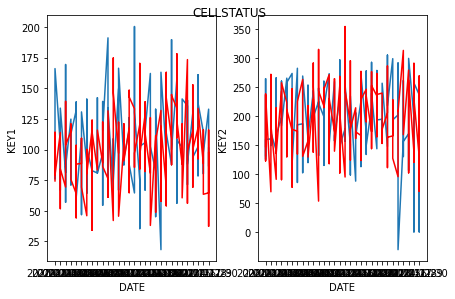

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()
fig.suptitle('CELLSTATUS')
ax1.plot(df['DATE'],df['KEY1'])
ax1.plot(df['DATE'],df['NOM_KEY1'],color='red')
ax1.set(xlabel='DATE', ylabel='KEY1')
ax2.plot(df['DATE'],df['KEY2'])
ax2.plot(df['DATE'],df['NOM_KEY2'],color='red')
ax2.set(xlabel='DATE', ylabel='KEY2')

## Histogram of KEY1 and KEY2

(array([ 1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  2.,  0.,  2.,  2.,  2.,  2.,  5.,  3.,  4.,
         5.,  6., 10., 10.,  8.,  4.,  8.,  6.,  9.,  5., 12.,  7.,  9.,
         9., 11.,  3.,  7.,  6.,  5.,  6.,  2.,  1.,  2.,  3.]),
 array([-30.623226  , -23.90456268, -17.18589936, -10.46723604,
         -3.74857272,   2.9700906 ,   9.68875392,  16.40741724,
         23.12608056,  29.84474388,  36.5634072 ,  43.28207052,
         50.00073384,  56.71939716,  63.43806048,  70.1567238 ,
         76.87538712,  83.59405044,  90.31271376,  97.03137708,
        103.7500404 , 110.46870372, 117.18736704, 123.90603036,
        130.62469368, 137.343357  , 144.06202032, 150.78068364,
        157.49934696, 164.21801028, 170.9366736 , 177.65533692,
        184.37400024, 191.09266356, 197.81132688, 204.5299902 ,
        211.24865352, 217.96731684, 224.68598016, 231.40464348,
        238.1233068 , 244.84197012, 251.56063344, 258.27929676,
        264.

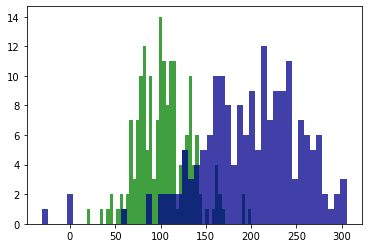

In [10]:
plt.hist(df['KEY1'],50, facecolor='green', alpha=0.75)
plt.hist(df['KEY2'],50, facecolor='darkblue', alpha=0.75)

## Statistic Description

In [11]:
mean = df['KEY1'].mean()
std = df['KEY1'].std()
print('KEY1 mean: {}   std: {}'.format(mean,std))
exl_z3 = df.loc[ (df.KEY1 < mean - 3*std) | (df.KEY1 > mean + 3*std),'KEY1'].count() 
print('Z3-score: {}  ({})'.format(exl_z3,0.0027*df.shape[0]) )

mean = df['KEY2'].mean()
std = df['KEY2'].std()
print('KEY2 mean: {}   std: {}'.format(mean,std))
exl_z3 = df.loc[ (df.KEY2 < mean - 3*std) | (df.KEY2 > mean + 3*std),'KEY2'].count() 
print('Z3-score: {}  ({})'.format(exl_z3,0.0027*df.shape[0]) )

KEY1 mean: 104.22986389444446   std: 29.68762631165119
Z3-score: 1  (0.48600000000000004)
KEY2 mean: 197.97795743888886   std: 56.641270592616465
Z3-score: 3  (0.48600000000000004)
